In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.shape

(210, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
dups= df.duplicated()
print ('Number of duplicated rows =%d'%(dups.sum()))
df[dups]

Number of duplicated rows =0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


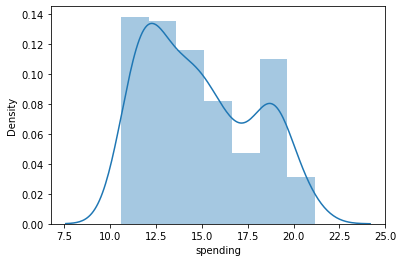

In [8]:
sns.distplot(df['spending']);

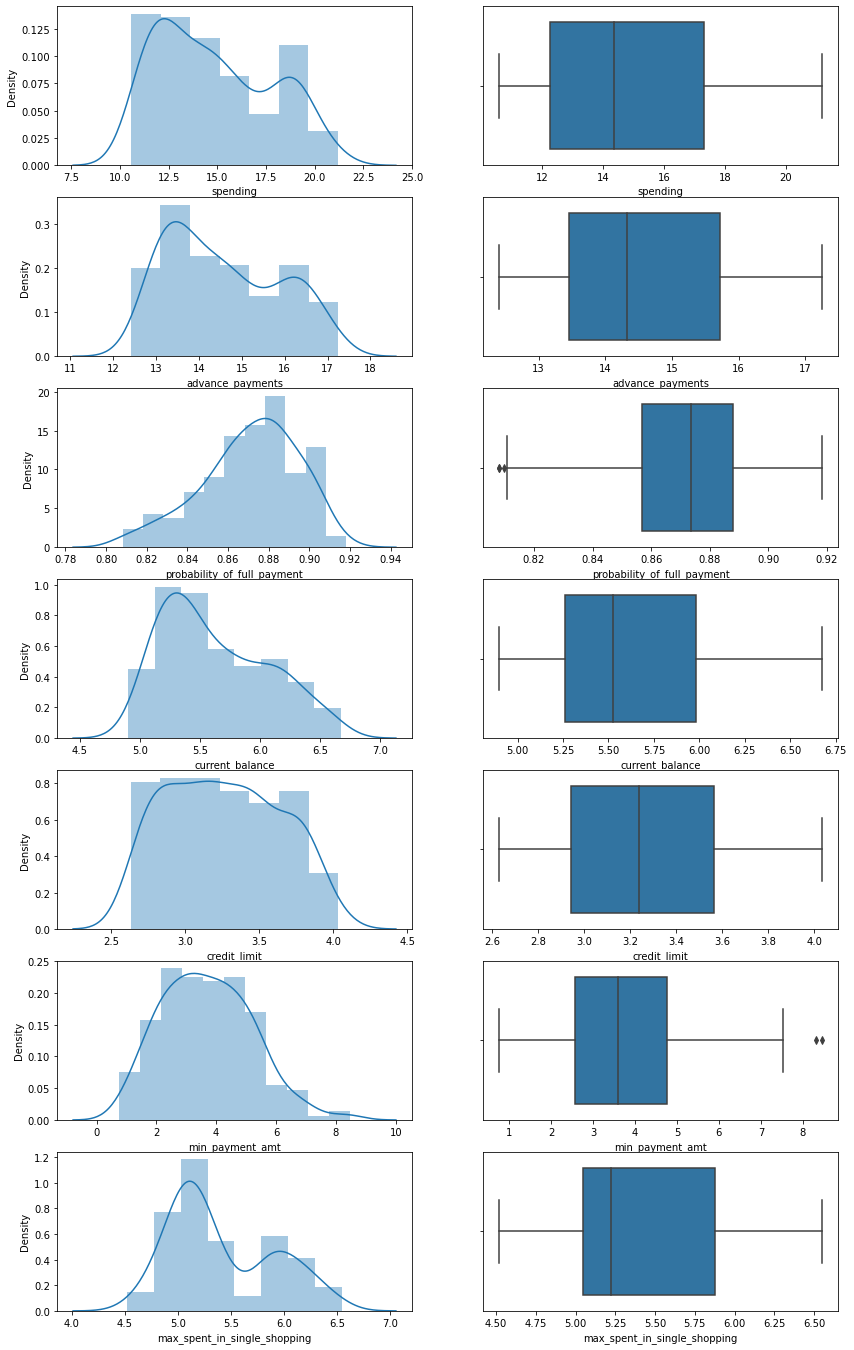

In [9]:
fig,axes=plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(14,24);

sns.distplot(df['spending'],ax=axes[0][0])
sns.boxplot(df['spending'],orient='H',ax=axes[0][1])

sns.distplot(df['advance_payments'],ax=axes[1][0])
sns.boxplot(df['advance_payments'],orient='H',ax=axes[1][1])

sns.distplot(df['probability_of_full_payment'],ax=axes[2][0])
sns.boxplot(df['probability_of_full_payment'],orient='H',ax=axes[2][1])

sns.distplot(df['current_balance'],ax=axes[3][0])
sns.boxplot(df['current_balance'],orient='H',ax=axes[3][1])

sns.distplot(df['credit_limit'],ax=axes[4][0])
sns.boxplot(df['credit_limit'],orient='H',ax=axes[4][1])

sns.distplot(df['min_payment_amt'],ax=axes[5][0])
sns.boxplot(df['min_payment_amt'],orient='H',ax=axes[5][1])

sns.distplot(df['max_spent_in_single_shopping'],ax=axes[6][0])
sns.boxplot(df['max_spent_in_single_shopping'],orient='H',ax=axes[6][1]);


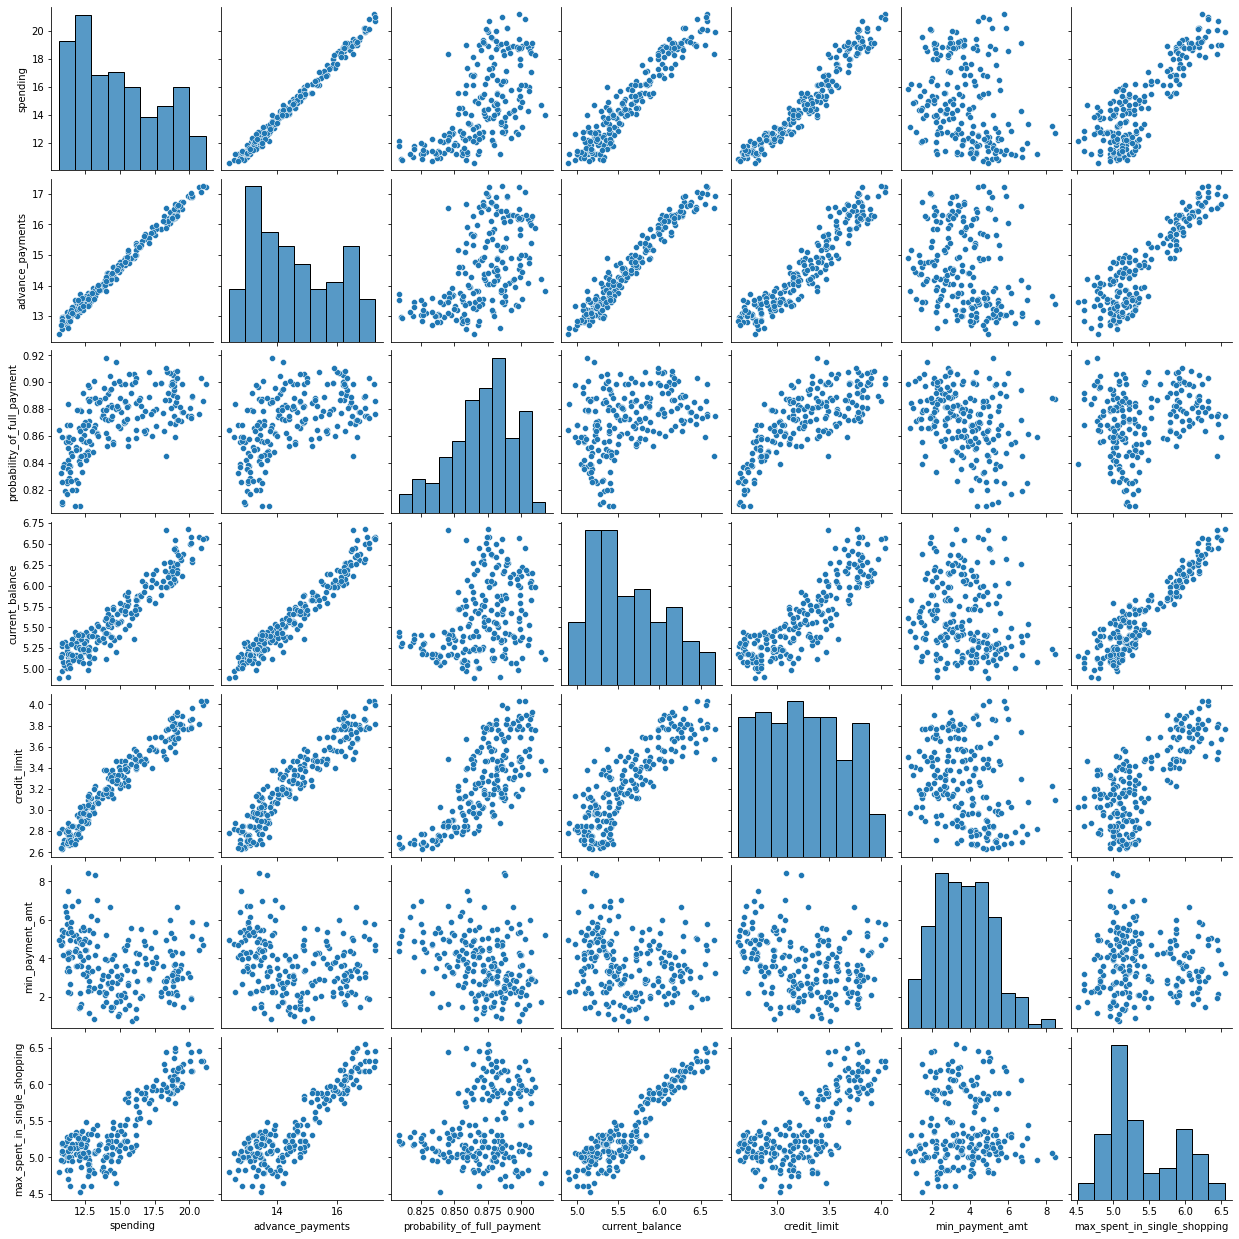

In [10]:
sns.pairplot(df);

In [11]:
df.skew(axis=0)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [12]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


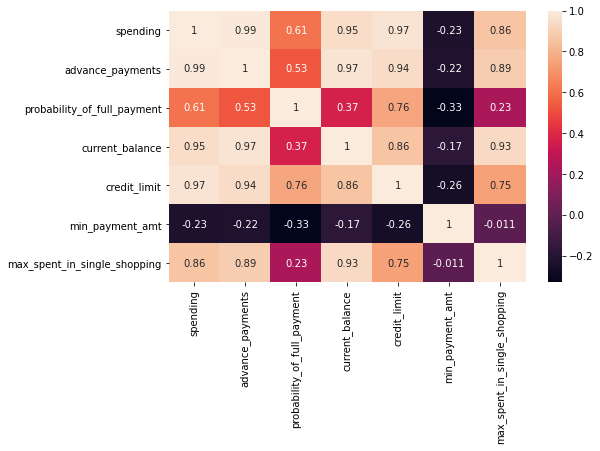

In [13]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(),annot=True);


In [14]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [15]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [16]:
wardlink=linkage(df_scaled,method='ward')

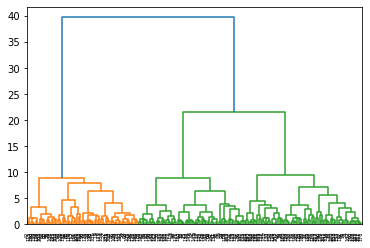

In [17]:
dend = dendrogram(wardlink)

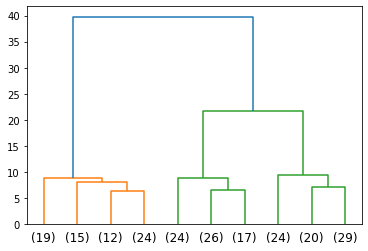

In [18]:
dendro = dendrogram(wardlink,
                  truncate_mode='lastp',
                  p=10)

In [19]:
from scipy.cluster.hierarchy import fcluster

In [20]:
clusters_1 = fcluster(wardlink, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [21]:
clusters_2 = fcluster(wardlink, 10, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [22]:
np.array_equal(clusters_1,clusters_2)

True

In [23]:
df['wardlink'] = clusters_2

In [24]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [25]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(df_scaled)
k_means2.labels_


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [27]:
k_means2.inertia_

659.171754487041

In [28]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(df_scaled)
k_means3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [29]:
k_means3.inertia_

430.6589731513006

In [30]:
wss =[] 

In [31]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(df_scaled)
        wss.append(KM.inertia_)

In [32]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.29354819439664,
 328.15041671866015,
 289.7743349593589,
 261.97239780464497,
 239.38290712104669,
 222.7207977556718,
 210.21023939157794]

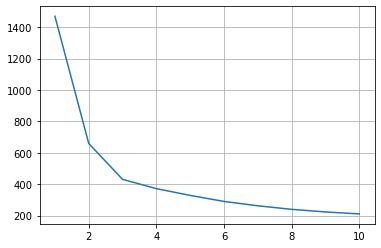

In [33]:
plt.plot(range(1,11), wss)
plt.grid()
plt.show()

In [56]:
k_means3 = KMeans(n_clusters = 3,random_state=123)
k_means3.fit(df_scaled)
labels=k_means3.labels_

In [57]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


In [36]:
silhouette_score(df_scaled,labels)

0.4007270552751299

In [37]:
silhouette_samples(df_scaled,labels).min()

0.002713089347678533

In [38]:
sil_width = silhouette_samples(df_scaled,labels)

In [39]:
df['sil_width']=sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


In [40]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


In [41]:
df.wardlink.value_counts().sort_index()

1    70
2    67
3    73
Name: wardlink, dtype: int64

In [50]:
df_profile=df.groupby('wardlink').mean()
df_profile['freq']=df.wardlink.value_counts().sort_index()
df_profile


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width,freq
wardlink,,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,0.114286,0.451629,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,1.014925,0.419314,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,1.890411,0.334857,73


In [43]:
df_profile.T

wardlink,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Clus_kmeans,0.114286,1.014925,1.890411
sil_width,0.451629,0.419314,0.334857
freq,70.000000,67.000000,73.000000


In [58]:
df.Clus_kmeans.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans, dtype: int64

In [59]:
df_kmeansprofile=df.groupby('Clus_kmeans').mean()
df_kmeansprofile['freq']=df.Clus_kmeans.value_counts().sort_index()
df_kmeansprofile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,sil_width,freq
Clus_kmeans,,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71


In [53]:
df_kmeansprofile=df.groupby('Clus_kmeans').mean()
df_kmeansprofile['freq']=df.Clus_kmeans.value_counts().sort_index()
df_kmeansprofile.T

Clus_kmeans,0,1,2
spending,18.495373,11.856944,14.437887
advance_payments,16.203433,13.247778,14.337746
probability_of_full_payment,0.884210,0.848253,0.881597
current_balance,6.175687,5.231750,5.514577
credit_limit,3.697537,2.849542,3.259225
min_payment_amt,3.632373,4.742389,2.707341
max_spent_in_single_shopping,6.041701,5.101722,5.120803
wardlink,1.029851,2.083333,2.873239
sil_width,0.468772,0.397473,0.339816
freq,67.000000,72.000000,71.000000
